In [1]:
!pip install xgboost

In [2]:
!pip install lightgbm

# 1.Import libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# 2.Import Data set

In [3]:
company=pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 3.Data Understanding

In [4]:
company.shape

(400, 11)

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
company.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


# 4.Data Preprocessing

In [9]:
lb=LabelEncoder()

In [10]:
company['ShelveLoc']=lb.fit_transform(company['ShelveLoc'])
company['Urban']=lb.fit_transform(company['Urban'])
company['US']=lb.fit_transform(company['US'])

In [11]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

##### Converting continuous data into categorical data

In [12]:
company['Sales'] = pd.cut(x=company['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [13]:
company['Sales']=lb.fit_transform(company['Sales'])

# 5.Model Building

In [14]:
X=company.drop('Sales',1)
y=company['Sales']

In [15]:
y.value_counts()

2    243
1    130
0     27
Name: Sales, dtype: int64

#### Splitting data into train set and test data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=56,stratify=y)

In [17]:
X_train.shape,y_train.shape

((320, 10), (320,))

In [18]:
classifier=DecisionTreeClassifier()

#### Automatic way to get optimal parameters

#### GridSearchCV

In [22]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [23]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=classifier,param_grid=grid)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 3, 1: 2, 2: 1},
                                              criterion='entropy',
                                              max_depth=556,
                                              max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=14),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 112, 223, 334, 445, 556, 667, 778,
                                       889, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 14]})

In [24]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 112,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [19]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=556,class_weight={0:3,1:2,2:1},max_features='sqrt',
                                  min_samples_leaf=2,min_samples_split=14)


# 6.Model Training

In [20]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 3, 1: 2, 2: 1}, criterion='entropy',
                       max_depth=556, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=14)

## ploting tree

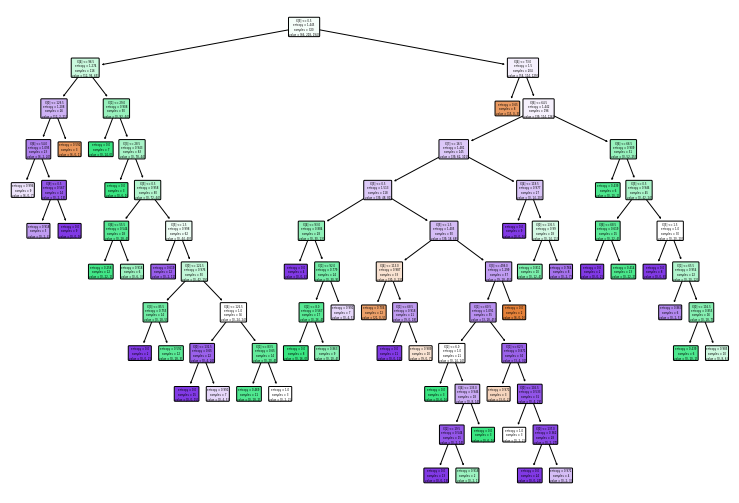

In [25]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,9))
plot_tree(decision_tree = classifier,filled=True,rounded=True)
plt.show()


# 7.Model Testing

##### Traning data

In [26]:
y_pred_train=classifier.predict(X_train)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  0.809375
-------------------------------------------
Confusion Matrix:
 [[ 20   0   2]
 [  0  95   9]
 [ 18  32 144]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.91      0.67        22
           1       0.75      0.91      0.82       104
           2       0.93      0.74      0.83       194

    accuracy                           0.81       320
   macro avg       0.73      0.85      0.77       320
weighted avg       0.84      0.81      0.81       320



##### Test data

In [28]:
y_pred_test=classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.6125
-------------------------------------------
Confusion Matrix:
 [[ 2  1  2]
 [ 0 17  9]
 [ 4 15 30]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.52      0.65      0.58        26
           2       0.73      0.61      0.67        49

    accuracy                           0.61        80
   macro avg       0.53      0.56      0.54        80
weighted avg       0.64      0.61      0.62        80



# Building Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rd_classifier=RandomForestClassifier()

In [190]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [191]:
from sklearn.model_selection import RandomizedSearchCV
random_search_cv=RandomizedSearchCV(estimator=rd_classifier, param_distributions=random_grid,
                                    random_state=23,n_iter=100,n_jobs=-1,cv=3,verbose=2)
random_final=random_search_cv.fit(X_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [192]:

param_grid = {
    'criterion': [random_final.best_params_['criterion']],
    'max_depth': [random_final.best_params_['max_depth']],
    'max_features': [random_final.best_params_['max_features']],
    'min_samples_leaf': [random_final.best_params_['min_samples_leaf'], 
                         random_final.best_params_['min_samples_leaf']+2, 
                         random_final.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [random_final.best_params_['min_samples_split'] - 2,
                          random_final.best_params_['min_samples_split'] - 1,
                          random_final.best_params_['min_samples_split'], 
                          random_final.best_params_['min_samples_split'] +1,
                          random_final.best_params_['min_samples_split'] + 2],
    'n_estimators': [random_final.best_params_['n_estimators'] - 200, random_final.best_params_['n_estimators'] - 100, 
                     random_final.best_params_['n_estimators'], 
                     random_final.best_params_['n_estimators'] + 100, random_final.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [670], 'max_features': ['auto'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [0, 100, 200, 300, 400]}


In [195]:
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=rd_classifier,param_grid=param_grid,n_jobs=-1,verbose=2)
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [670],
                         'max_features': ['auto'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [196]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 670,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'n_estimators': 300}

In [209]:
rd_classifier=RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=670,max_features='auto',min_samples_leaf=6,
                                    min_samples_split=15,class_weight={0:9,1:7,2:3})

rd_classifier=RandomForestClassifier()

# Model Training

In [210]:
rd_classifier=rd_classifier.fit(X_train,y_train)

# Model Testing | Model Evaluation

#### Train data

In [211]:
y_pred_train=rd_classifier.predict(X_train)


In [212]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  0.89375
-------------------------------------------
Confusion Matrix:
 [[ 16   0   6]
 [  0 100   4]
 [  0  24 170]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        22
           1       0.81      0.96      0.88       104
           2       0.94      0.88      0.91       194

    accuracy                           0.89       320
   macro avg       0.92      0.86      0.88       320
weighted avg       0.90      0.89      0.89       320



#### Test data

In [213]:
y_pred_test=rd_classifier.predict(X_test)

In [214]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.8125
-------------------------------------------
Confusion Matrix:
 [[ 0  0  5]
 [ 0 24  2]
 [ 0  8 41]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      0.92      0.83        26
           2       0.85      0.84      0.85        49

    accuracy                           0.81        80
   macro avg       0.53      0.59      0.56        80
weighted avg       0.77      0.81      0.79        80



# Building Gradient Boosting


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Model Training

In [26]:
gd_classifier=GradientBoostingClassifier()

In [32]:
#loss function
loss = ['deviance','exponential']
#learning Rate
learning_rate = [float(x) for x in np.linspace(start=0,stop=1,num=10)]
#criterion
criterion= ['friedman_mse', 'squared_error', 'mse', 'mae' ]
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion,
              'loss':loss,'learning_rate':learning_rate}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'], 'loss': ['deviance', 'exponential'], 'learning_rate': [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]}


In [34]:
random_cv=RandomizedSearchCV(estimator=gd_classifier,param_distributions=random_grid,n_iter=10,cv=3,n_jobs=-1,verbose=2,
                             random_state=99)
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.0,
                                                          0.1111111111111111,
                                                          0.2222222222222222,
                                                          0.3333333333333333,
                                                          0.4444444444444444,
                                                          0.5555555555555556,
                                                          0.6666666666666666,
                                                          0.7777777777777777,
                                                          0.8888888888888888,
                           

In [35]:

param_grid = {
    'criterion': [random_cv.best_params_['criterion']],
    'max_depth': [random_cv.best_params_['max_depth']],
    'max_features': [random_cv.best_params_['max_features']],
    'min_samples_leaf': [random_cv.best_params_['min_samples_leaf'], 
                         random_cv.best_params_['min_samples_leaf']+2, 
                         random_cv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [random_cv.best_params_['min_samples_split'] - 2,
                          random_cv.best_params_['min_samples_split'] - 1,
                          random_cv.best_params_['min_samples_split'], 
                          random_cv.best_params_['min_samples_split'] +1,
                          random_cv.best_params_['min_samples_split'] + 2],
    'n_estimators': [random_cv.best_params_['n_estimators'] - 200, random_cv.best_params_['n_estimators'] - 100, 
                     random_cv.best_params_['n_estimators'], 
                     random_cv.best_params_['n_estimators'] + 100, random_cv.best_params_['n_estimators'] + 200],
    'loss':[random_cv.best_params_['loss']],
    'learning_rate':[random_cv.best_params_['learning_rate']]
}

print(param_grid)

{'criterion': ['squared_error'], 'max_depth': [780], 'max_features': ['auto'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [8, 9, 10, 11, 12], 'n_estimators': [1000, 1100, 1200, 1300, 1400], 'loss': ['deviance'], 'learning_rate': [0.3333333333333333]}


In [37]:
grid_cv=GridSearchCV(estimator=gd_classifier,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_cv.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.3333333333333333],
                         'loss': ['deviance'], 'max_depth': [780],
                         'max_features': ['auto'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [1000, 1100, 1200, 1300, 1400]},
             verbose=2)

In [40]:
grid_cv.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.3333333333333333,
 'loss': 'deviance',
 'max_depth': 780,
 'max_features': 'auto',
 'min_samples_leaf': 12,
 'min_samples_split': 9,
 'n_estimators': 1300}

In [42]:
gd_classifier=GradientBoostingClassifier(criterion= 'squared_error',learning_rate=0.3333333333333333,loss= 'deviance',
                                        max_depth = 780,max_features = 'auto',min_samples_leaf = 12,min_samples_split = 9,
                                       n_estimators = 1300)

In [43]:
gd_classifier=gd_classifier.fit(X_train,y_train)

# Model Testing | Model Evaluation

#### Training data

In [44]:
y_pred_train=gd_classifier.predict(X_train)

In [47]:
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  1.0
-------------------------------------------
Confusion Matrix:
 [[ 22   0   0]
 [  0 104   0]
 [  0   0 194]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       194

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



#### Testing data

In [48]:
y_pred_test=gd_classifier.predict(X_test)

In [49]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.75
-------------------------------------------
Confusion Matrix:
 [[ 0  0  5]
 [ 0 15 11]
 [ 1  3 45]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      0.58      0.68        26
           2       0.74      0.92      0.82        49

    accuracy                           0.75        80
   macro avg       0.52      0.50      0.50        80
weighted avg       0.72      0.75      0.72        80



# Adaboosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ad_classifier=AdaBoostClassifier()

In [56]:
n_estimators = [int(x) for x in np.linspace(200,1000,10)]
learning_rate= [float(x) for x in np.linspace(0,1,10)]
algorithm=['SAMME', 'SAMME.R']
grid={'n_estimators':n_estimators,'learning_rate':learning_rate,'algorithm':algorithm}
print(grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'learning_rate': [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0], 'algorithm': ['SAMME', 'SAMME.R']}


In [57]:
gridsearch=GridSearchCV(estimator=ad_classifier,param_grid=grid,n_jobs=-1,cv=5,verbose=2)
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0, 0.1111111111111111,
                                           0.2222222222222222,
                                           0.3333333333333333,
                                           0.4444444444444444,
                                           0.5555555555555556,
                                           0.6666666666666666,
                                           0.7777777777777777,
                                           0.8888888888888888, 1.0],
                         'n_estimators': [200, 288, 377, 466, 555, 644, 733,
                                          822, 911, 1000]},
             verbose=2)

In [58]:
gridsearch.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.5555555555555556,
 'n_estimators': 911}

# Model Training

In [59]:
ad_classifier=AdaBoostClassifier(algorithm = 'SAMME.R',learning_rate=0.5555555555555556,n_estimators=911)

In [60]:
ad_classifier.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5555555555555556, n_estimators=911)

# Model Testing and Model Evaluation

#### Training data

In [62]:
y_pred_train=ad_classifier.predict(X_train)

In [63]:
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  0.846875
-------------------------------------------
Confusion Matrix:
 [[ 19   0   3]
 [  0  79  25]
 [  2  19 173]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.81      0.76      0.78       104
           2       0.86      0.89      0.88       194

    accuracy                           0.85       320
   macro avg       0.86      0.84      0.85       320
weighted avg       0.85      0.85      0.85       320



#### Test data

In [65]:
y_pred_test=ad_classifier.predict(X_test)

In [66]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.8
-------------------------------------------
Confusion Matrix:
 [[ 1  0  4]
 [ 0 18  8]
 [ 1  3 45]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.86      0.69      0.77        26
           2       0.79      0.92      0.85        49

    accuracy                           0.80        80
   macro avg       0.72      0.60      0.63        80
weighted avg       0.79      0.80      0.79        80



# Building XGboost

In [69]:
from xgboost import XGBClassifier

In [70]:
xg_classifier=XGBClassifier()

# Model Training

In [72]:
xg_classifier.fit(X_train,y_train)

[10:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

# Model Testing | Model Evaluation

#### train data

In [73]:
y_pred_train=xg_classifier.predict(X_train)

In [74]:
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  1.0
-------------------------------------------
Confusion Matrix:
 [[ 22   0   0]
 [  0 104   0]
 [  0   0 194]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       194

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



#### test data

In [76]:
y_pred_test=xg_classifier.predict(X_test)

In [77]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.7625
-------------------------------------------
Confusion Matrix:
 [[ 0  0  5]
 [ 0 16 10]
 [ 1  3 45]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.84      0.62      0.71        26
           2       0.75      0.92      0.83        49

    accuracy                           0.76        80
   macro avg       0.53      0.51      0.51        80
weighted avg       0.73      0.76      0.74        80



# Building lightgradient boosting

In [78]:
from lightgbm import LGBMClassifier

In [79]:
lgbm_classifier=LGBMClassifier()

# Model Training

In [80]:
lgbm_classifier.fit(X_train,y_train)

LGBMClassifier()

# Model Testing | Model Evaluation

#### Train data

In [81]:
y_pred_train=lgbm_classifier.predict(X_train)

In [82]:
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  1.0
-------------------------------------------
Confusion Matrix:
 [[ 22   0   0]
 [  0 104   0]
 [  0   0 194]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       194

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [83]:
y_pred_test=lgbm_classifier.predict(X_test)

In [84]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.8
-------------------------------------------
Confusion Matrix:
 [[ 1  0  4]
 [ 0 17  9]
 [ 1  2 46]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.89      0.65      0.76        26
           2       0.78      0.94      0.85        49

    accuracy                           0.80        80
   macro avg       0.72      0.60      0.63        80
weighted avg       0.80      0.80      0.79        80



# Constructed Different Ensemble Techiques along with Decision Tree ,Random forest and saw it is working with different algorithms